<a href="https://colab.research.google.com/github/Kbcity1/checkpoint/blob/master/CWPredictingCategoricalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML: PREDICTING A CATEGORICAL DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_data = pd.read_csv('/content/Loan_Data.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_copy = loan_data.copy()
loan_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_copy.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_copy.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [14]:
num = loan_copy.select_dtypes(include='number')
cat = loan_copy.select_dtypes(exclude='number')
print('Numerical Data')
display(num.head())
print('\nCategorical Data')
display(cat.head())

Numerical Data


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,NaN,360.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0
2,0.0,3000,0.0,66.0,360.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0



Categorical Data


,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y


In [9]:
#to see why dependants column is in categorical data
loan_copy['Dependents'].sample(200).values

array(['0', '0', '3+', '0', '0', '0', '1', '0', '0', '0', '0', '0', '3+',
       '1', '0', '0', '0', '2', '1', '0', '2', '0', '0', '0', '0', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '2', nan, '1',
       '1', '0', '2', '2', '0', '2', '2', '3+', '0', '0', '1', '0', '2',
       '0', '1', '3+', '1', '2', '0', '0', '0', '0', '2', '2', '0', '0',
       '2', '2', '0', '0', '0', nan, nan, '1', '1', '0', '1', '3+', '2',
       '2', '0', '0', '1', '2', '3+', '0', '0', '0', '2', '2', '0', '0',
       '2', '2', '0', '0', '0', '2', '0', '0', '3+', nan, '0', '0', '1',
       '3+', '1', '2', '0', '2', '0', '3+', '1', '0', '2', '0', '1', '0',
       '0', '0', '2', '1', '0', '0', '0', '3+', '2', '0', '1', '1', '1',
       nan, '2', '2', '0', '0', '1', '0', '0', nan, '0', nan, '2', '2',
       '3+', '2', '0', '0', '1', '3+', '0', '0', '2', '0', '3+', '1', '0',
       '2', '2', '0', '0', '3+', '3+', '0', '1', '3+', '3+', '0', '0',
       '0', '0', '0', '1', '0', '2', '1', '2', '1', 

In [12]:
#cleaning the dependents column
loan_copy['Dependents'] = loan_copy['Dependents'].replace('3+', 3)
loan_copy['Dependents'] = loan_copy['Dependents'].astype(float)
loan_copy['Dependents'].dtypes

dtype('float64')

In [17]:
#fill in the missing values
for i in loan_copy.columns:
  # Call the sum() method to get the actual sum of null values
  if ((loan_copy[i].isnull().sum() / len(loan_copy)) * 100) < 30:
    if loan_copy[i].dtypes != 'O':
      loan_copy[i].fillna(loan_copy[i].mean(), inplace=True)
    else:
      loan_copy[i].fillna(loan_copy[i].mode()[0], inplace=True)
  else:
    loan_copy.drop(i, axis=1, inplace=True)
loan_copy.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [21]:
#scaling remeber we scale the data with the highest standard deviation data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib
loan_copy.drop('Loan_ID', axis=1, inplace=True)
colToScale = ['ApplicantIncome', 'CoapplicantIncome']
for i in loan_copy.columns:
  if loan_copy[i].dtypes != 'O':
    scaler = StandardScaler()
    loan_copy[i] = scaler.fit_transform(loan_copy[[i]])
    joblib.dump(scaler, open(f'{i}_scaler.pkl', 'wb'))
loan_copy.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,-0.761490,Graduate,No,0.072991,-0.554487,0.000000,0.279851,0.45164,Urban,Y
1,Male,Yes,0.236612,Graduate,No,-0.134412,-0.038732,-0.219273,0.279851,0.45164,Rural,N
2,Male,Yes,-0.761490,Graduate,Yes,-0.393747,-0.554487,-0.957641,0.279851,0.45164,Urban,Y
3,Male,Yes,-0.761490,Not Graduate,No,-0.462062,0.251980,-0.314547,0.279851,0.45164,Urban,Y
4,Male,No,-0.761490,Graduate,No,0.097728,-0.554487,-0.064454,0.279851,0.45164,Urban,Y


In [22]:
#encoding ie turning categorical to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in loan_copy.columns:
  if loan_copy[i].dtypes == 'O':
    encoder = LabelEncoder()
    loan_copy[i] = encoder.fit_transform(loan_copy[i])
    joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb'))
loan_copy.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,-0.761490,0,0,0.072991,-0.554487,0.000000,0.279851,0.45164,2,1
1,1,1,0.236612,0,0,-0.134412,-0.038732,-0.219273,0.279851,0.45164,0,0
2,1,1,-0.761490,0,1,-0.393747,-0.554487,-0.957641,0.279851,0.45164,2,1
3,1,1,-0.761490,1,0,-0.462062,0.251980,-0.314547,0.279851,0.45164,2,1
4,1,0,-0.761490,0,0,0.097728,-0.554487,-0.064454,0.279851,0.45164,2,1


In [18]:
#feature selection
!pip install xgboost

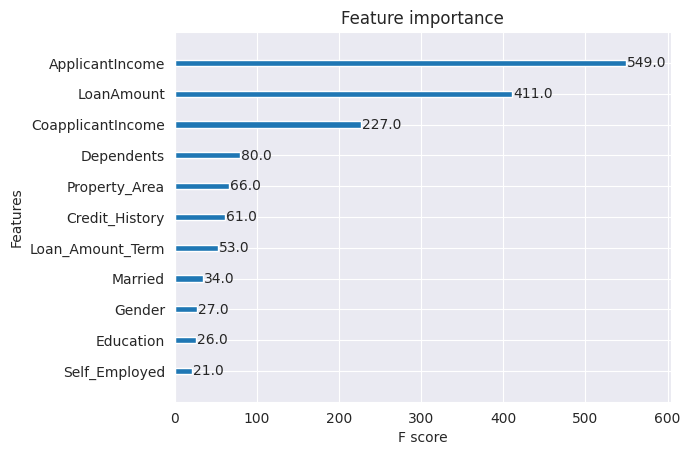

In [25]:
#FEATURE Selection
import matplotlib.pyplot as plt
import xgboost
# Import the XGBClassifier class, not the module
from xgboost import XGBClassifier

# Instantiate the XGBClassifier class
featureSel = XGBClassifier()
x = loan_copy.drop('Loan_Status', axis=1)
y = loan_copy.Loan_Status
featureSel.fit(x, y)
#print the feature importance score
xgboost.plot_importance(featureSel, importance_type = 'weight')
plt.show()

In [29]:
#creating a new dataframe with top 7 column
selectedCol = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Dependents', 'Property_Area', 'Credit_History', 'Loan_Amount_Term', 'Loan_Status']
newData = loan_copy[selectedCol]
newData.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
0,0.072991,0.000000,-0.554487,-0.761490,2,0.45164,0.279851,1
1,-0.134412,-0.219273,-0.038732,0.236612,0,0.45164,0.279851,0
2,-0.393747,-0.957641,-0.554487,-0.761490,2,0.45164,0.279851,1
3,-0.462062,-0.314547,0.251980,-0.761490,2,0.45164,0.279851,1
4,0.097728,-0.064454,-0.554487,-0.761490,2,0.45164,0.279851,1


In [32]:
#split into train and test
from sklearn.model_selection import train_test_split
x = newData.drop('Loan_Status', axis=1)
y = newData.Loan_Status

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, stratify= y)
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (491, 7)
x_test shape: (123, 7)
y_train shape: (491,)
y_test shape: (123,)


In [33]:
#here we concatinate
test = pd.concat([x_test, y_test], axis=1)
train = pd.concat([x_train, y_train], axis=1)
print('Test Data')
display(test.head())
print('\nTrain Data')
display(train.head())

Test Data


,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
99,-0.597054,-0.183546,0.656581,-0.76149,1,0.45164,0.279851,1
210,0.753029,0.804914,-0.554487,-0.76149,1,0.45164,0.279851,0
350,0.602802,0.971642,-0.554487,-0.76149,1,0.45164,0.279851,1
454,0.275479,-0.743276,-0.554487,-0.76149,1,0.45164,0.279851,1
364,0.232393,-0.064454,-0.554487,-0.76149,0,0.45164,0.279851,1



Train Data


,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
501,-0.367699,-0.552730,-0.554487,-0.761490,1,4.516405e-01,0.279851,1
611,0.437174,1.269371,-0.472404,0.236612,2,4.516405e-01,0.279851,1
323,-0.366552,-0.171637,0.466422,-0.761490,0,3.177548e-16,0.279851,1
110,-0.014328,-0.124000,-0.554487,-0.761490,2,4.516405e-01,0.279851,1
541,-0.534965,-0.564639,-0.554487,-0.761490,1,-2.410441e+00,0.279851,0


In [38]:
#THE MODEL
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [39]:
#PREDICTION
from sklearn.metrics import classification_report
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.45      0.61        38
           1       0.80      0.99      0.88        85

    accuracy                           0.82       123
   macro avg       0.87      0.72      0.75       123
weighted avg       0.84      0.82      0.80       123

